Importing Packages

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import pandas as pd

Loading Data and defining classes with 0,1 (1 for those having tumor and 0 for those which doesn't have tumor)

In [25]:
path = os.listdir('G:/data/Training/')
classes = {'glioma_tumor_training':1,'meningioma_tumor_training':1,'no_tumor_training':0,'pituitary_tumor_training':1}
X = []
Y = []
for cls in classes:
    pth = 'G:/data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
X = np.array(X)
Y = np.array(Y)





reshape the array from horizontal to vertical

In [12]:
X_updated = X.reshape(len(X), -1)

calcuating total values in 1 and 0

In [13]:
pd.Series(Y).value_counts()

1    2475
0     395
dtype: int64

Shape before updation and after updation

In [14]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

Splitting Data to training set and data set


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)
print(xtrain.shape, xtest.shape)
print(ytrain.shape,ytest.shape)

(2296, 40000) (574, 40000)
(2296,) (574,)


Printing maximum and minimum values before and after normalizing the data

In [16]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Training the data using logistic regression and using SVM(Support Vector Machine)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

Testing for glioma tumor dataset


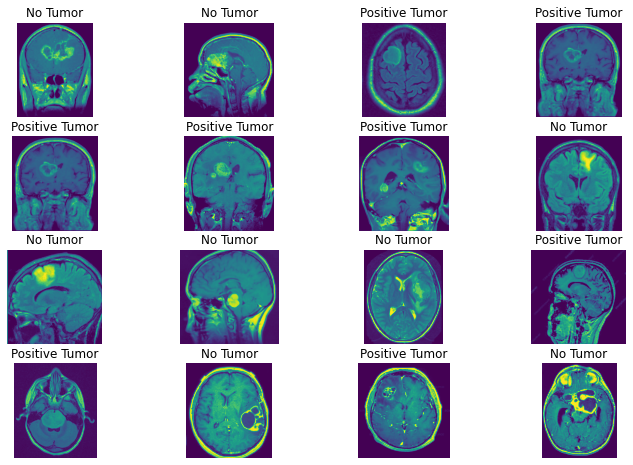

In [18]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('G:/data/Testing/')
c=1
for i in os.listdir('G:/data/Testing/glioma_tumor_testing/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('G:/data/Testing/glioma_tumor_testing/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

Testing on meningioma tumor dataset

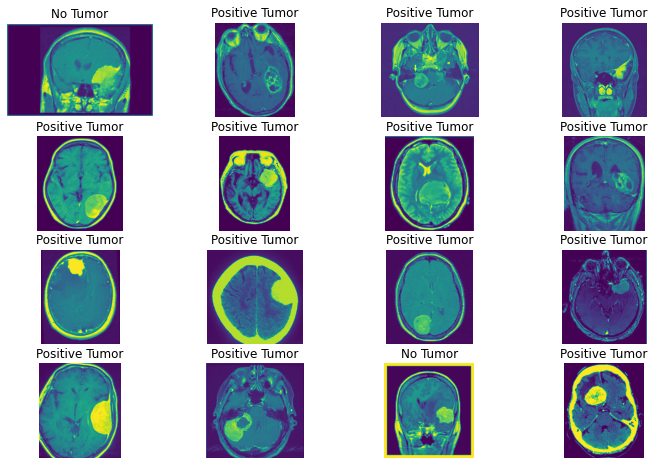

In [19]:
plt.figure(figsize=(12,8))
p = os.listdir('G:/data/Testing/')
c=1
for i in os.listdir('G:/data/Testing/meningioma_tumor_testing/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('G:/data/Testing/meningioma_tumor_testing/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

Testing for when there is no tumor

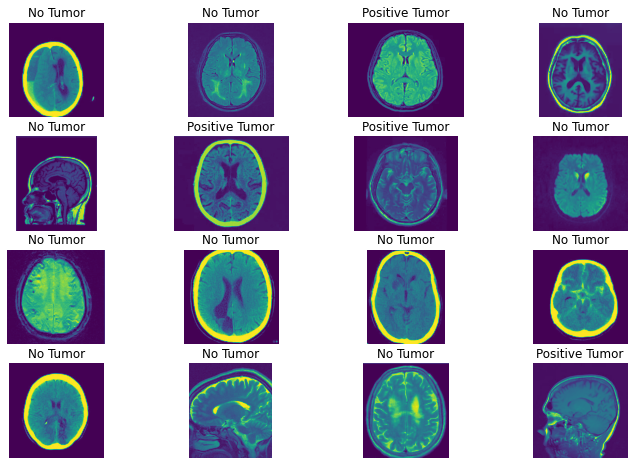

In [20]:
plt.figure(figsize=(12,8))
p = os.listdir('G:/data/Testing/')
c=1
for i in os.listdir('G:/data/Testing/no_tumor_testing/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('G:/data/Testing/no_tumor_testing/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

Testing for pituitary tumor dataset

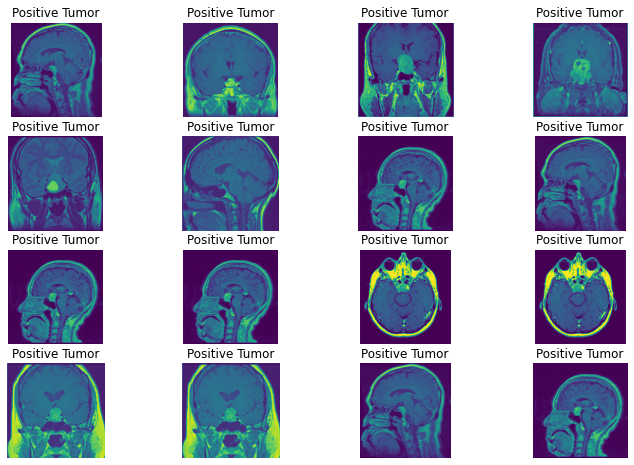

In [21]:
plt.figure(figsize=(12,8))
p = os.listdir('G:/data/Testing/')
c=1
for i in os.listdir('G:/data/Testing/pituitary_tumor_testing/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('G:/data/Testing/pituitary_tumor_testing/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c+=1

Testing for some random image containing tumor

(-0.5, 916.5, 815.5, -0.5)

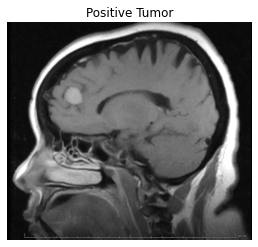

In [36]:
img=cv2.imread('C:/Users/OM/Downloads/testcase-1.jpg',0)
img1 = cv2.resize(img,(200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')





Testing for some random image which does not contain tumor.

(-0.5, 235.5, 235.5, -0.5)

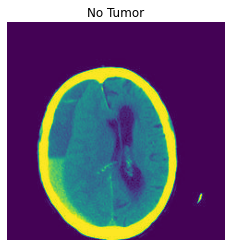

In [43]:
img=cv2.imread('G:/data/Testing/no_tumor_testing/image(1).jpg',0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(dec[p[0]])
plt.imshow(img)
plt.axis('off')